# mAiLab_0005: ActivationFunction

In [95]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) # adjust the size of figures


Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['tanh']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


HW0005：

◎ 基本題

畫出底下的函數及其一次微分的圖：
1. Sigmoid
2. tanh
3. ReLU
4. Leaky ReLU
5. ELU

本次無進階題。

In [96]:
def plot_all(x, function, df, mode_f, mode_df):
    _, ax = plt.subplots(1, 2)
    ax[0].title.set_text(function.__name__)
    ax[1].title.set_text(df.__name__)
    function = function(x)
    df = df(x)
    #plot f
    if mode_f == 'center':
        ax[0].spines['left'].set_position('center')
        ax[0].spines['bottom'].set_position('center')
        ax[0].spines['right'].set_position('center')
        ax[0].spines['top'].set_position('center')
        ax[0].plot(x, function)
        
    elif mode_f == 'bottom':
        ax[0].spines['left'].set_position('center')
        ax[0].spines['right'].set_position('center')
        ax[0].spines['top'].set_color('none')
        ax[0].xaxis.set_ticks_position('bottom')
        ax[0].plot(x, function)
        
    
    #plot df
    if mode_df == 'center':
        ax[1].spines['left'].set_position('center')
        ax[1].spines['bottom'].set_position('center')
        ax[1].spines['right'].set_position('center')
        ax[1].spines['top'].set_position('center')
        ax[1].plot(x, df)
        
    elif mode_df == 'bottom':
        ax[1].spines['left'].set_position('center')
        ax[1].spines['right'].set_position('center')
        ax[1].spines['top'].set_color('none')
        ax[1].xaxis.set_ticks_position('bottom')
        ax[1].plot(x, df)
    

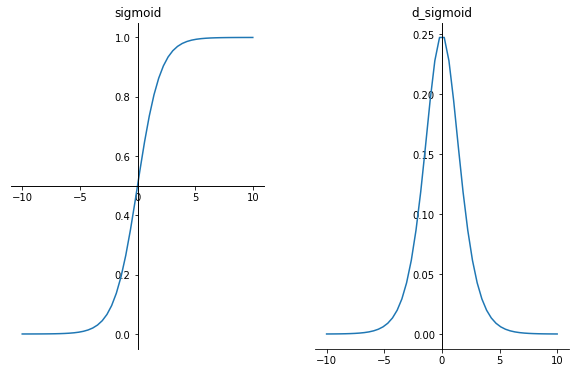

In [97]:
### Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

if __name__ == '__main__':
    #define x domain
    x = np.linspace(-10., 10., 50)
    #plot figure
    plot_all(x, sigmoid, d_sigmoid, 'center', 'bottom')

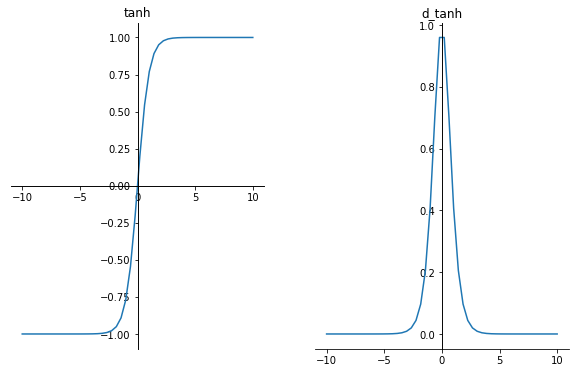

In [98]:
### Hyperbolic Tangent (tanh)
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def d_tanh(x):
    return 1 - np.square(tanh(x))

if __name__ == '__main__':
    #define x domain
    x = np.linspace(-10., 10., 50)
    #plot figure
    plot_all(x, tanh, d_tanh, 'center', 'bottom')

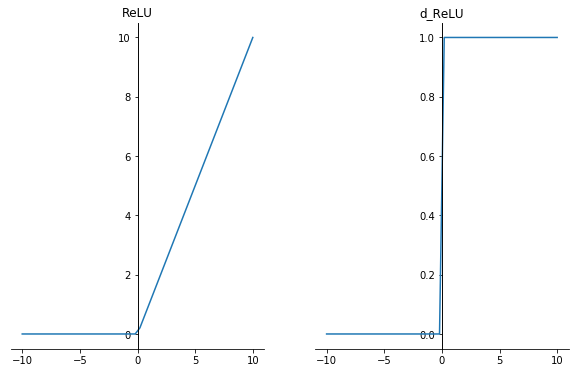

In [99]:
### Rectified Linear Unit (ReLU)
def ReLU(x):
    return x * (x > 0)  #another expression: np.where(x > 0, x, 0)

def d_ReLU(x):
    return 1 * (x > 0)  #another expression: np.where(x > 0, 1, 0)

if __name__ == '__main__':
    #define x domain
    x = np.linspace(-10., 10., 50)
    #plot figure
    plot_all(x, ReLU, d_ReLU, 'bottom', 'bottom')

### About Leaky ReLU:

ref:  https://zhuanlan.zhihu.com/p/25110450

...
人們為了解決Dead ReLU Problem，提出了將ReLU的前半段設為0.01x而非0。另外一種直觀的想法是基於參數的方法，即Parametric ReLU: f(x) = max(alpha x, x)，其中 alpha
可由back propagation學出來。理論上來講，Leaky ReLU有ReLU的所有優點，外加不會有Dead ReLU問題，但是在實際操作當中，並沒有完全證明Leaky ReLU總是好於ReLU。
...



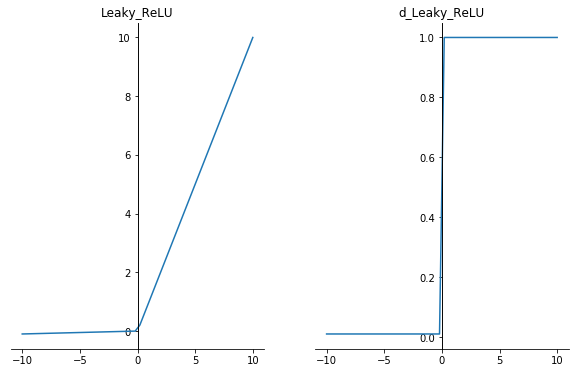

In [100]:
### Leaky ReLU
def Leaky_ReLU(x):
    return 0.01 * x * (x < 0) + x * (x > 0)  

def d_Leaky_ReLU(x):
    return 0.01 * (x < 0) + 1 * (x > 0)  

if __name__ == '__main__':
    #define x domain
    x = np.linspace(-10., 10., 50)
    #plot figure
    plot_all(x, Leaky_ReLU, d_Leaky_ReLU, 'bottom', 'bottom')

### About Exponential ReLU (ELU):

ref:  https://zhuanlan.zhihu.com/p/25110450

...
ELU也是為解決ReLU存在的問題而提出，顯然，ELU有ReLU的基本所有優點，以及：

(1) 不會有Dead ReLU問題<br>
(2) 輸出的均值接近0，zero-centered

它的一個小問題在於計算量稍大。類似於Leaky ReLU，理論上雖然好於ReLU，但在實際使用中目前並沒有好的證據ELU總是優於ReLU。
...

![](https://www.zhihu.com/equation?tex=f%28x%29%3D+%0A%5Cbegin%7Bcases%7D%0A+++x%2C%26+%5Ctext%7Bif+%7D+x+%3E+0%5C%5C++++++++%0A+++%5Calpha%28e%5Ex+-+1%29%2C+++++++++%26+%5Ctext%7Botherwise%7D%0A%5Cend%7Bcases%7D)

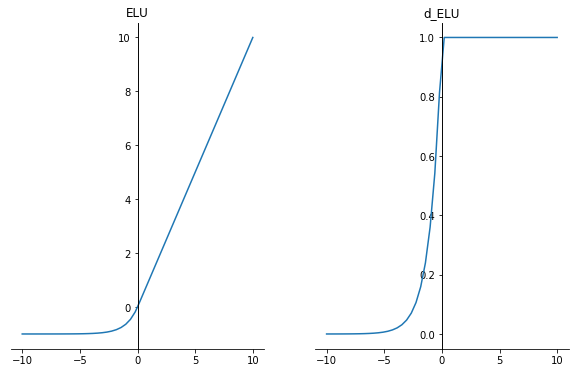

In [101]:
### Exponential ReLU (ELU)
def ELU(x, alpha=1):
    return alpha * (np.exp(x) - 1) * (x < 0) + x * (x > 0) 

def d_ELU(x, alpha=1):
    return alpha * (np.exp(x)) * (x < 0) + 1 * (x > 0)  

if __name__ == '__main__':
    #define x domain
    x = np.linspace(-10., 10., 50)
    #plot figure
    plot_all(x, ELU, d_ELU, 'bottom', 'bottom')